#### Import the iris dataset from seaborn available in the form of a Pandas dataframe

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### A vizualtization of the Iris dataset

/home/jupyterlab/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


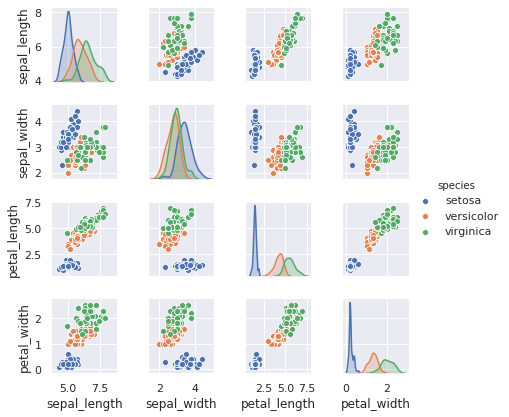

In [2]:
%matplotlib inline
import seaborn as sns ; sns.set();
sns.pairplot(iris, hue = 'species' , size = 1.5);

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)

In [5]:
X_iris = iris.drop('species', axis =1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']

#### Supervised learning example: Iris classification 

In [8]:
from sklearn.naive_bayes import GaussianNB # choose a model class
model = GaussianNB() # instantiate model
model.fit(Xtrain, ytrain) # fit model to data
y_model = model.predict(Xtest) # predict on new data

In [9]:
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_model)

0.9736842105263158

Accuracy of 97%, this classification algorithm is effective for this dataset !

#### Unsupervised learning: Iris dimensionality 

In [10]:
from sklearn.decomposition import PCA 
model = PCA (n_components = 2 )
model.fit(X_iris)
X_2D = model.transform(X_iris) #tranform the data to two dimensions 

IRIS projected to two dimensions


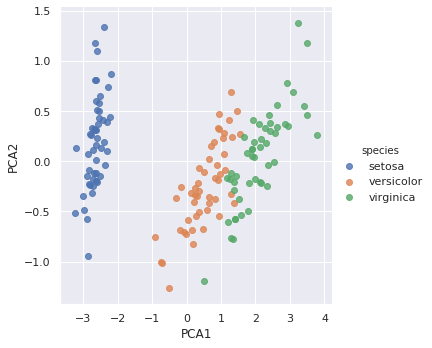

In [11]:
iris['PCA1']= X_2D[:, 0]
iris['PCA2'] =X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue = 'species', data = iris, fit_reg = False)

#### Unsupervised learning: Iris clustering

In [12]:
from sklearn import mixture
from sklearn.mixture import GaussianMixture
model = GaussianMixture( n_components = 3, covariance_type = 'full')
model.fit(X_iris)
y_gmm = model.predict(X_iris) #determine cluser labels

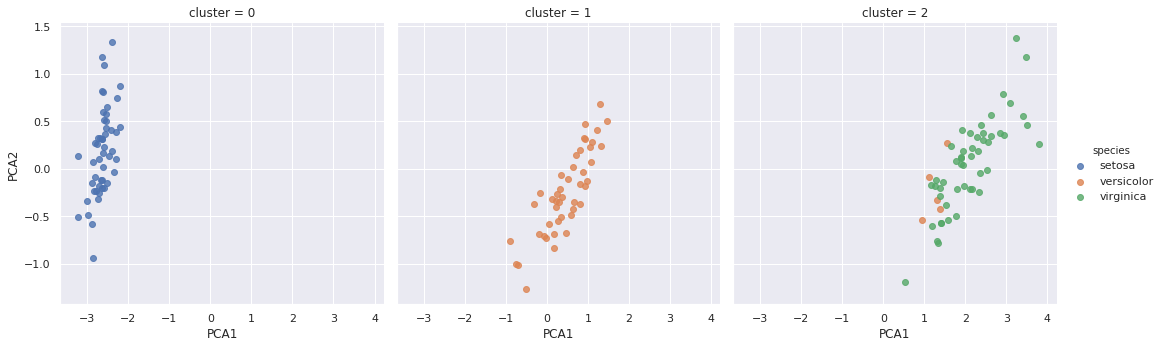

In [13]:
iris['cluster'] = y_gmm 
sns.lmplot("PCA1", "PCA2", data = iris, hue = "species" , col = "cluster" , fit_reg = False)

By splitting the data by cluster number, we can see how well the GaussianMixture algorithm has recovered the uderlying label: 
    - the setosa specicies is separately perfectly within cluster 0;
    - regarding thre versicolor & virginica, there remains a samll amount of versicolor in cluster 3. 
    
Which means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm.
